In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

In [2]:
import json
f = open('egleft.json')
left = json.load(f)
f = open('egright.json')
right = json.load(f)
f = open('egcenter.json')
center = json.load(f)

In [3]:
l = np.size(left)
r = np.size(right)
xl = []
yl = []
zl = []
xr = []
yr = []
zr = []
xc = []
yc = []
zc = []
# data[1]["WORLDPOSX"]

In [4]:
for i in left:
    xl.append(i["WORLDPOSX"])
    yl.append(i["WORLDPOSY"])
    zl.append(i["WORLDPOSZ"])
for i in right:
    xr.append(i["WORLDPOSX"])
    yr.append(i["WORLDPOSY"])
    zr.append(i["WORLDPOSZ"])
for i in center:
    xc.append(i["WORLDPOSX"])
    yc.append(i["WORLDPOSY"])
    zc.append(i["WORLDPOSZ"])

np.size(xl)


3826

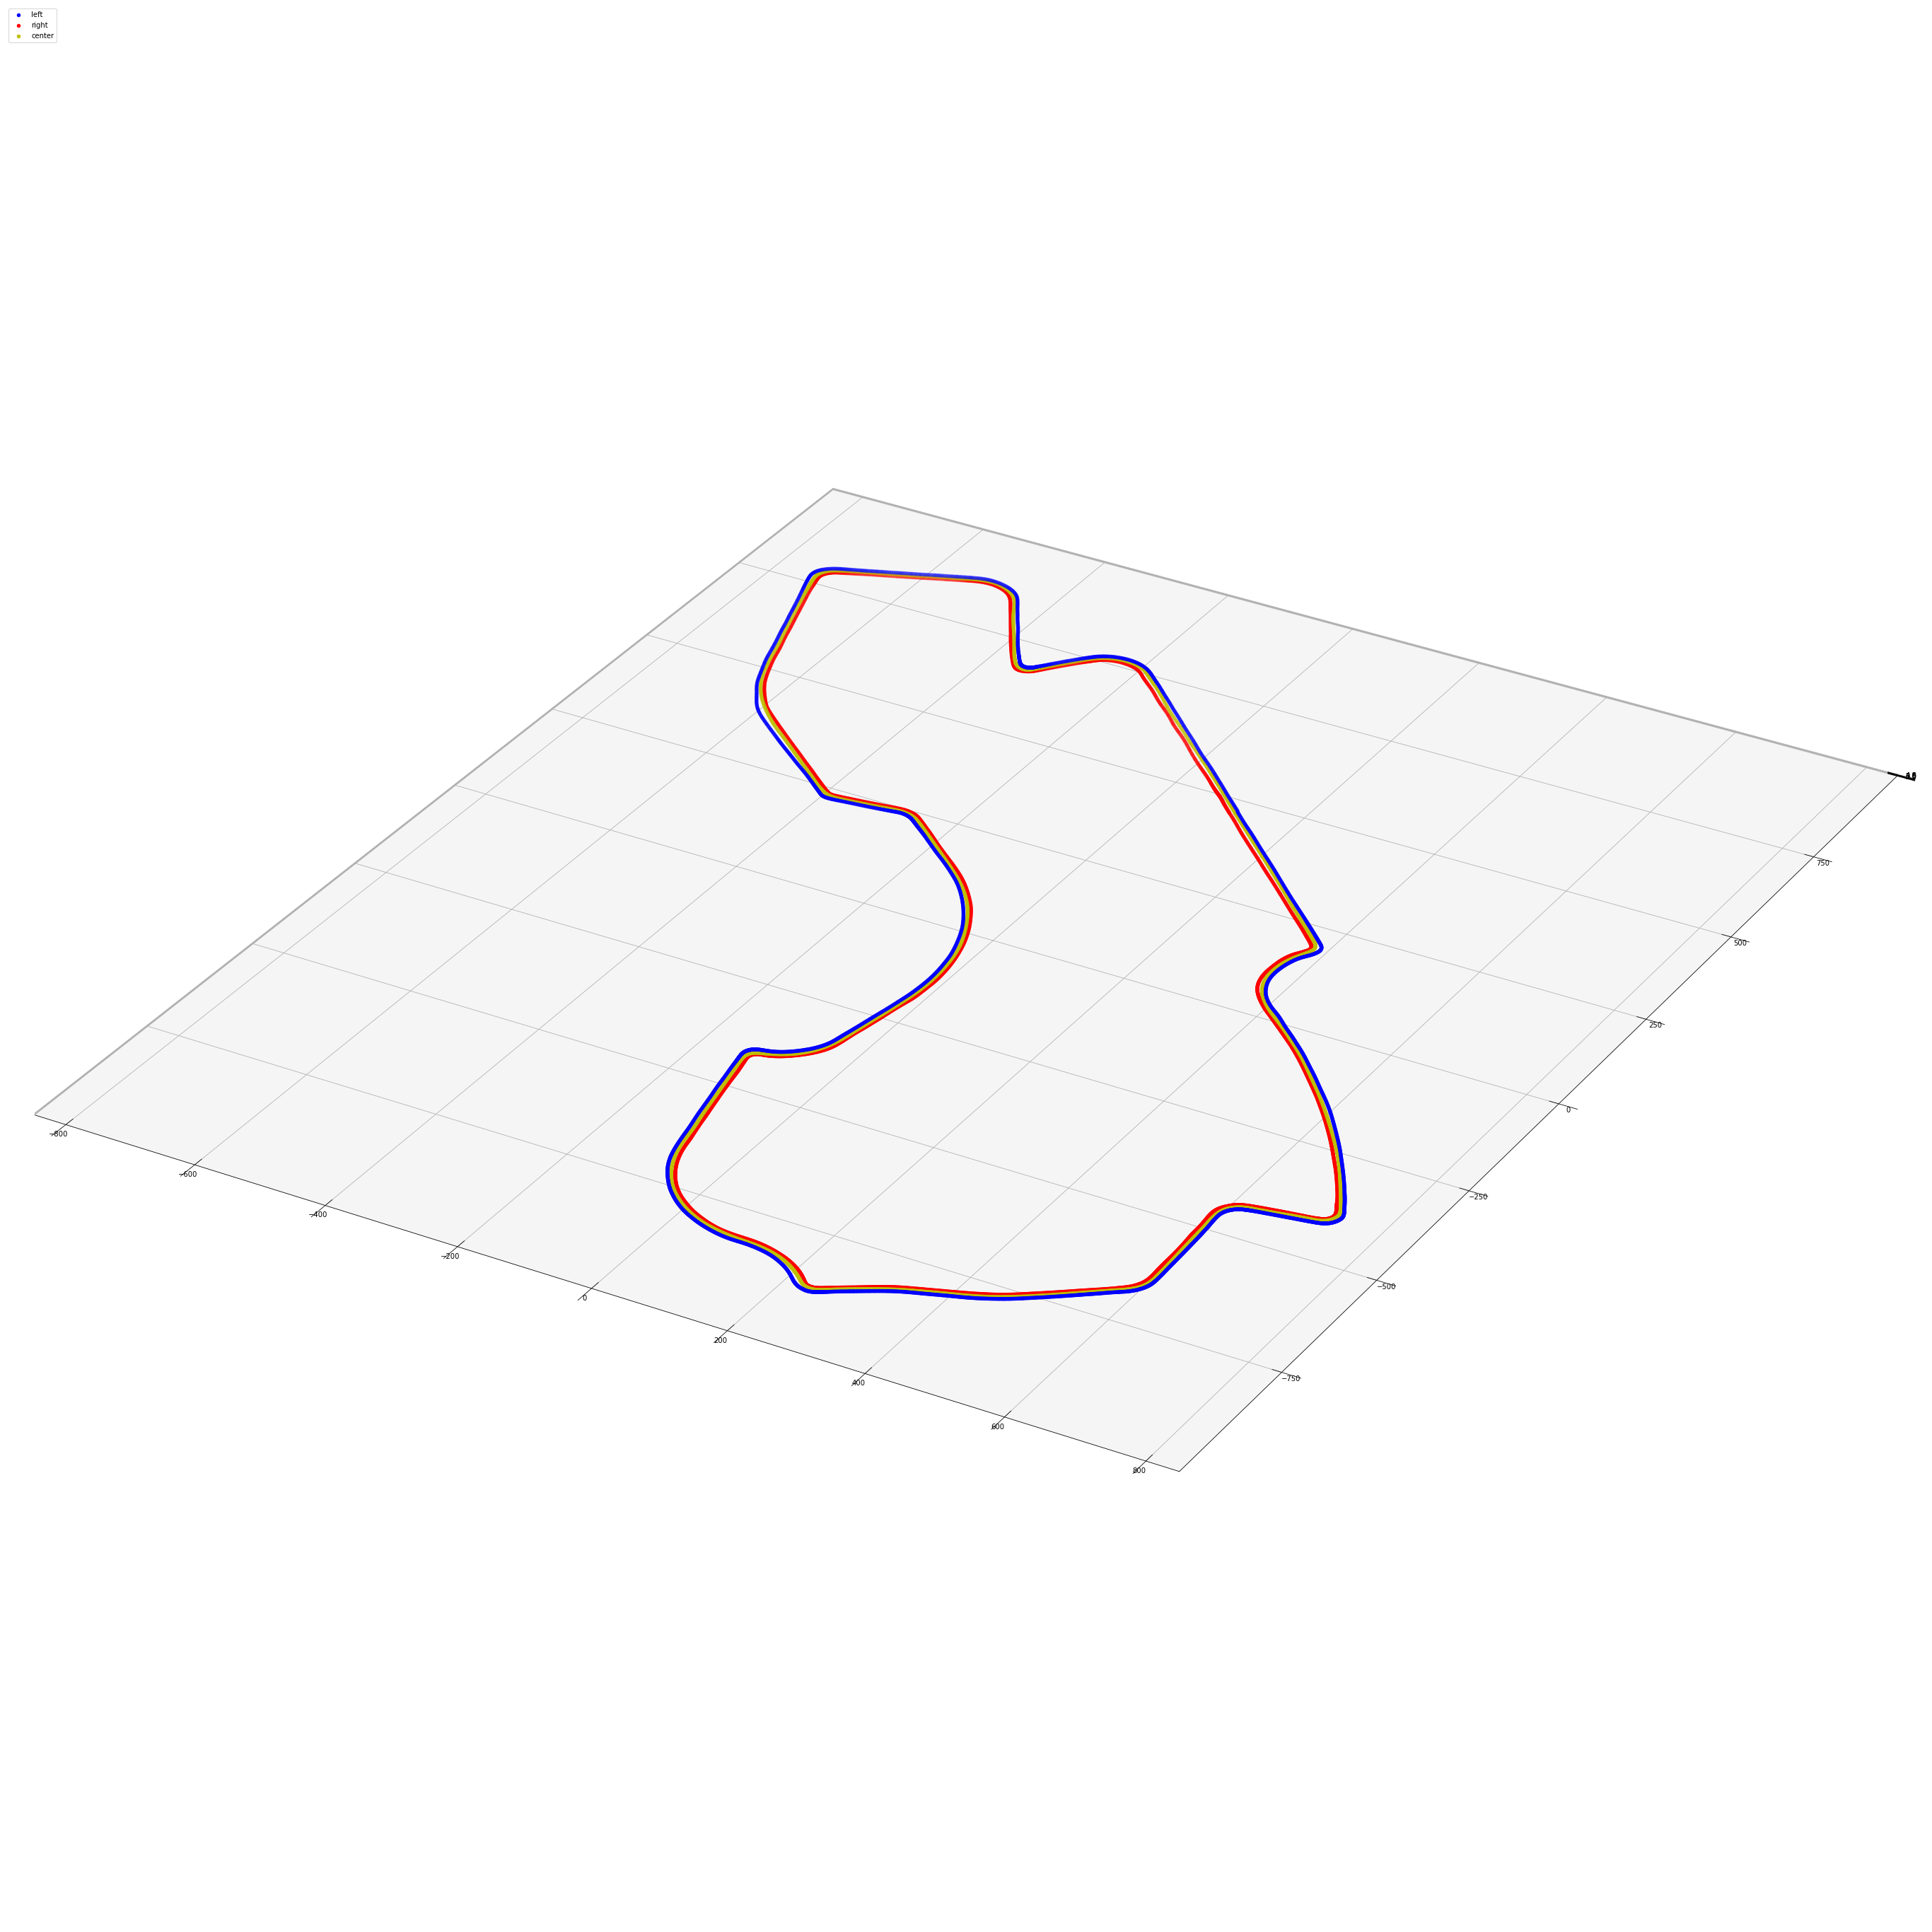

In [5]:
plt.rcParams['figure.figsize'] = [100, 50]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect((np.ptp(xl), np.ptp(yl), np.ptp(zl)))  # aspect ratio is 1:1:1 in data space
ax.scatter(xl, yl, zl,c='b', label='left')
ax.scatter(xr, yr, zr,c='r', label='right')
ax.scatter(xc, yc, zc,c='y', label='center')
plt.legend(loc='upper left');
plt.show()


In [18]:
x = xl + xr + xc
y = yl + yr + yc
z = zl + zr + zc
x = xc
y = yc
z = zc

In [19]:
# del x[0]
np.size(z)

3548

In [20]:
import open3d as o3d
xyz = np.zeros((np.size(x), 3))
xyz[:, 0] = np.reshape(x, -1)
xyz[:, 1] = np.reshape(y, -1)
xyz[:, 2] = np.reshape(z, -1)
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)
o3d.io.write_point_cloud("center.ply", pcd)

True

In [22]:
pcd_load = o3d.io.read_point_cloud("example.ply")
o3d.visualization.draw_geometries([pcd_load])

[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.
[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.
